<a href="https://colab.research.google.com/github/uuu4/CatsVsDogs/blob/main/Cats_vs_Dogs_Classification_with_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats vs Dogs Classification with TensorFlow
Bu notebookta:
1. "Cats vs Dogs" dataseti indirilecek.
2. Görseller önişlemeye tabi tutulacak.
3. Bir CNN modeli geliştirilip eğitilecek(CNN).
4. Modelin performansı analiz edilecek.

In [ ]:
# gerekli kütüphaneler
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
# dataseti indirip unzip etme
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip -d data/

--2024-12-27 21:54:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.167.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   206MB/s    in 0.3s    

2024-12-27 21:54:18 (206 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: data/cats_and_dogs_filtered/
  inflating: data/cats_and_dogs_filtered/vectorize.py  
   creating: data/cats_and_dogs_filtered/validation/
   creating: data/cats_and_dogs_filtered/train/
   creating: data/cats_and_dogs_filtered/validation/dogs/
  inflating: data/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: data/cats_an

In [ ]:
# indirilen dataset için yol tanımı
base_dir = 'data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# CNN modeli kurulumu
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary sınıflandırma
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model eğitimi Google Colab free sürüm ile yaklaşık 18 dakika sürüyor
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5342 - loss: 1.1204 - val_accuracy: 0.5150 - val_loss: 0.7009
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6080 - loss: 0.6552 - val_accuracy: 0.6370 - val_loss: 0.6211
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6810 - loss: 0.5887 - val_accuracy: 0.6710 - val_loss: 0.5918
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.6850 - loss: 0.5970 - val_accuracy: 0.6910 - val_loss: 0.5794
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7117 - loss: 0.5605 - val_accuracy: 0.6940 - val_loss: 0.5680
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7217 - loss: 0.5350 - val_accuracy: 0.6900 - val_loss: 0.5787
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7448 - loss: 0.5101 - val_accuracy: 0.7190 - val_loss: 0.5545
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7649 - loss: 0.4763 - val_accuracy: 0.7310 - val_loss: 0.542

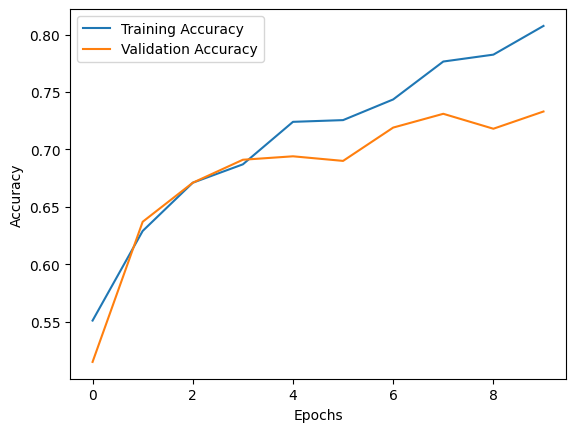

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('cats_vs_dogs_model.h5')